In [1]:
import pandas as pd
df = pd.read_csv('train.csv')
TARGETS = df.columns[-6:]
print('Train shape:', df.shape )
print('Targets', list(TARGETS))
df.head()


Train shape: (106800, 15)
Targets ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [2]:
train = df.groupby('eeg_id')[['spectrogram_id','spectrogram_label_offset_seconds']].agg(
    {'spectrogram_id':'first','spectrogram_label_offset_seconds':'min'})
train.columns = ['spectrogram_id','min']

tmp = df.groupby('eeg_id')[['spectrogram_id','spectrogram_label_offset_seconds']].agg(
    {'spectrogram_label_offset_seconds':'max'})
train['max'] = tmp

tmp = df.groupby('eeg_id')[['patient_id']].agg('first')
train['patient_id'] = tmp

tmp = df.groupby('eeg_id')[TARGETS].agg('sum')
for t in TARGETS:
    train[t] = tmp[t].values
    
y_data = train[TARGETS].values
y_data = y_data / y_data.sum(axis=1,keepdims=True)
train[TARGETS] = y_data

tmp = df.groupby('eeg_id')[['expert_consensus']].agg('first')
train['target'] = tmp

train = train.reset_index()
print('Train non-overlapp eeg_id shape:', train.shape )

train.head(20)

Train non-overlapp eeg_id shape: (17089, 12)


,eeg_id,spectrogram_id,min,max,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,target
0,568657,789577333,0.0,16.0,20654,0.000000,0.000000,0.250000,0.000000,0.166667,0.583333,Other
1,582999,1552638400,0.0,38.0,20230,0.000000,0.857143,0.000000,0.071429,0.000000,0.071429,LPD
2,642382,14960202,1008.0,1032.0,5955,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,Other
3,751790,618728447,908.0,908.0,38549,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,GPD
4,778705,52296320,0.0,0.0,40955,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,Other
5,1629671,2036345030,0.0,160.0,37481,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Seizure
6,1895581,128369999,1138.0,1138.0,47999,0.076923,0.000000,0.000000,0.000000,0.076923,0.846154,Other
7,2061593,320962633,1450.0,1450.0,23828,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,Other
8,2078097,2074135650,3342.0,3342.0,61174,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,Other
9,2366870,1232582129,0.0,30.0,23633,0.000000,0.333333,0.000000,0.000000,0.000000,0.666667,Other


In [3]:

import numpy as np

ycol = ['seizure_vote', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote', 'other_vote']
cd = {'Seizure': 'seizure_vote', 'GPD': 'gpd_vote', 'LRDA': 'lrda_vote', 'Other': 'other_vote', 'GRDA': 'grda_vote', 'LPD': 'lpd_vote'}


eeg_id_col = train.iloc[:, 0]  
prob_cols = train.iloc[:, -7:-1]  
label_col = train.iloc[:, -1] 


prob_cols = prob_cols.astype("float32")


prob_cols_normalized = prob_cols.div(prob_cols.sum(axis=1), axis=0)


normalized_data = pd.concat([eeg_id_col, prob_cols_normalized, label_col], axis=1)

normalized_data.head(20)

,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,target
0,568657,0.000000,0.000000,0.250000,0.000000,0.166667,0.583333,Other
1,582999,0.000000,0.857143,0.000000,0.071429,0.000000,0.071429,LPD
2,642382,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,Other
3,751790,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,GPD
4,778705,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,Other
5,1629671,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Seizure
6,1895581,0.076923,0.000000,0.000000,0.000000,0.076923,0.846154,Other
7,2061593,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,Other
8,2078097,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,Other
9,2366870,0.000000,0.333333,0.000000,0.000000,0.000000,0.666667,Other


In [ ]:
normalized_data.to_csv("normalized_data.csv", index=False)

In [32]:
normalized_data = pd.read_csv("normalized_data.csv")

In [33]:
labels = normalized_data["target"]

In [34]:
EEG_PATH = 'train_eegs/'
train_path = 'normalized_data.csv'


In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import numpy as np
import pandas as pd
import glob
from scipy.signal import butter, sosfilt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
import time

import pandas as pd

from EGGDataset import EEGDataset
dataset = EEGDataset(train_path, EEG_PATH)

from sklearn.model_selection import train_test_split

train_dataset, test_dataset, train_label, test_label = train_test_split(dataset, labels, test_size=0.2, random_state=42)


train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=True)

In [41]:
import torch.nn.functional as F

class CNNLSTM(nn.Module):

    def __init__(self, in_channels=8, num_classes=6):
        super(CNNLSTM, self).__init__()
        self.conv1 = nn.Conv1d(in_channels, 32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm1d(32)
        self.relu1 = nn.ReLU(inplace=True)
        self.dropout1 = nn.Dropout(p=0.5)
        self.pool1 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv1d(32, 64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU(inplace=True)
        self.dropout2 = nn.Dropout(p=0.75)
        self.pool2 = nn.MaxPool1d(kernel_size=2, stride=2)

        self.lstm1 = nn.LSTM(input_size=64, hidden_size=128, num_layers=1, batch_first=True, bidirectional=True)
        self.lstm2 = nn.LSTM(input_size=256, hidden_size=128, num_layers=1, batch_first=True, bidirectional=True)

        self.attention = nn.Sequential(
            nn.Linear(128 * 2, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
        )

        self.fc = nn.Linear(128 * 2, num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.pool2(x)

        # reshape for LSTM
        batch_size, channels, seq_length = x.size()
        x = x.permute(0, 2, 1)

        # First LSTM layer
        x, _ = self.lstm1(x)

        # Second LSTM layer
        x, _ = self.lstm2(x)
        
        # Attention layer
        att_weights = F.softmax(self.attention(x), dim=1)
        x = torch.sum(att_weights * x, dim=1)

        # Fully connected layer
        x = self.fc(x)

    

        return x

In [39]:
# Create a list of class names
class_names = ['Seizure', 'LPD', 'GDP', 'LRDA', 'GRDA', 'Other']

# Create a dictionary to map class names to indices
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

# Create a dictionary to map indices to class names
idx_to_class = {idx: class_name for idx, class_name in enumerate(class_names)}

In [42]:
input_channels = 8
num_classes = 6  


model = CNNLSTM(in_channels=input_channels, num_classes=num_classes)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

s = 0
num_epochs = 3
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_dataloader):
        print(f"Dataloader: {i+1}/{len(train_dataloader)} - {round(time.time()-s,2)}s")
        s = time.time()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_dataloader)}")

Dataloader: 1/428 - 1715776583.45s
Dataloader: 2/428 - 10.53s
Dataloader: 3/428 - 9.36s
Dataloader: 4/428 - 8.44s
Dataloader: 5/428 - 8.78s
Dataloader: 6/428 - 9.16s
Dataloader: 7/428 - 10.52s
Dataloader: 8/428 - 10.61s
Dataloader: 9/428 - 8.26s
Dataloader: 10/428 - 8.31s
Dataloader: 11/428 - 9.18s
Dataloader: 12/428 - 8.87s
Dataloader: 13/428 - 8.97s
Dataloader: 14/428 - 9.8s
Dataloader: 15/428 - 10.42s
Dataloader: 16/428 - 10.83s
Dataloader: 17/428 - 14.03s
Dataloader: 18/428 - 13.61s
Dataloader: 19/428 - 9.76s
Dataloader: 20/428 - 9.48s
Dataloader: 21/428 - 9.75s
Dataloader: 22/428 - 9.93s
Dataloader: 23/428 - 9.85s
Dataloader: 24/428 - 10.83s
Dataloader: 25/428 - 8.65s
Dataloader: 26/428 - 8.82s
Dataloader: 27/428 - 9.38s
Dataloader: 28/428 - 9.73s
Dataloader: 29/428 - 11.17s
Dataloader: 30/428 - 10.86s
Dataloader: 31/428 - 10.54s
Dataloader: 32/428 - 9.51s
Dataloader: 33/428 - 10.1s
Dataloader: 34/428 - 10.42s
Dataloader: 35/428 - 10.28s
Dataloader: 36/428 - 9.14s
Dataloader: 37/4

In [43]:
torch.save(model.state_dict(), 'epoch_3.pth')

In [98]:
#train model more
num_epochs = 4
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_dataloader):
        s = time.time()
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_dataloader)}")
    torch.save(model.state_dict(), f'model_epoch_{num_epochs}.pth')


Epoch 1, Loss: 1.2469233327379852
Epoch 2, Loss: 1.22542110767877
Epoch 3, Loss: 1.2178817504198751
Epoch 4, Loss: 1.2123543588079024


In [65]:
# test_path = 'test.csv'
# TEST_EEG_PATH = 'test_eegs'

# class TestEEGDataset(Dataset):
#     def __init__(self, csv_file, eeg_path):
#         self.csv = pd.read_csv(csv_file)  # Load the CSV file
#         self.eeg_path = eeg_path
#         self.sos = self.butter_bandpass_filter_init()  # Initialize the Butterworth filter parameters
#         self.FEATS = ['Fp1','T3','C3','O1','Fp2','C4','T4','O2']
        
#     def __len__(self):
#         return len(self.csv)
    
#     def butter_bandpass_filter_init(self):
#         lowcut = 0.5  # Set the low-frequency cutoff for bandpass filtering
#         highcut = 45.0  # Set the high-frequency cutoff for bandpass filtering
#         fs = 200.0  # Sampling frequency
#         order = 5  # Filter order

#         nyq = 0.5 * fs
#         low = lowcut / nyq
#         high = highcut / nyq
#         sos = butter(order, [low, high], analog=False, btype='band', output='sos')  # Create second-order sections for the Butterworth filter
#         return sos

#     def butter_bandpass_filter(self, data):
#         y = sosfilt(self.sos, data)
#         return y

#     def __getitem__(self, idx):
#         eeg_id = self.csv.loc[idx, 'eeg_id']
#         eeg_file_path = "/Users/chloenguyen/Downloads/eeg_data/test_eegs/3911565283.parquet"  # Build the EEG data file path
#         eeg_data = pd.read_parquet(eeg_file_path)[self.FEATS].values  # Load EEG data from Parquet file

#         eeg_data = self.butter_bandpass_filter(eeg_data)  # Apply filtering to the data
#         eeg_data = torch.tensor(eeg_data, dtype=torch.float32)  # Convert to PyTorch tensor
         
#         # Select 10,000 data points from the middle
#         mid_index = eeg_data.shape[0] // 2
#         start_index = mid_index - 5000  # Offset 5000 data points to the left from the middle
#         end_index = mid_index + 5000  # Offset 5000 data points to the right from the middle
#         eeg_data = eeg_data[start_index:end_index]
#         # Swap dimensions
#         eeg_data = torch.transpose(eeg_data, 0, 1)
        
#         return eeg_data


# testdataset = TestEEGDataset(test_path, TEST_EEG_PATH)


# test_dataloader = DataLoader(testdataset, batch_size=32, shuffle=True)


model.eval()

predictions = []

with torch.no_grad():
    for inputs, _ in test_dataloader:
        outputs = model(inputs)
      
        probabilities = torch.softmax(outputs, dim=1)
        predictions.append(probabilities.cpu().numpy())


predictions = np.concatenate(predictions, axis=0)


print(predictions)

KeyboardInterrupt: 

In [99]:
import torch

# Define the model architecture
model1 = CNNLSTM(in_channels=8, num_classes=6)

# Load the model weights
model1.load_state_dict(torch.load("epoch_427.pth"))


<All keys matched successfully>

In [100]:
# Set the model to evaluation mode
model.eval()

# Initialize list to store predictions
predictions = []

# No need to track gradients for evaluation
with torch.no_grad():
    for data, _ in test_dataloader:
        # Forward pass
        output = model(data)

        # Store predictions
        predictions.extend(output.numpy())

# Convert list to numpy array
predictions = np.array(predictions)


In [101]:
predictions_class = np.argmax(predictions, axis=1)
#count how many different classes
unique, counts = np.unique(predictions_class, return_counts=True)
print(unique, counts)

[0 1 2 3 4 5] [  24   49   10    3   13 3319]


In [102]:
#fit the model to the test data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Create a list of class names
class_names = ['Seizure', 'LPD', 'GPD', 'LRDA', 'GRDA', 'Other']

# Create a dictionary to map class names to indices
class_to_idx = {class_name: idx for idx, class_name in enumerate(class_names)}

# Create a dictionary to map indices to class names
idx_to_class = {idx: class_name for idx, class_name in enumerate(class_names)}

# Convert test labels to indices
test_label_idx = test_label.map(class_to_idx)

print(f"Test label indices: {test_label_idx}")


Test label indices: 5761     2
5290     2
14548    5
6914     5
1346     2
        ..
1923     3
5361     1
14853    4
10707    1
8195     4
Name: target, Length: 3418, dtype: int64


In [103]:
# Calculate precision, recall, and F1 score
accuracy = accuracy_score(test_label_idx, predictions_class)
precision = precision_score(test_label_idx, predictions_class, average='macro')
recall = recall_score(test_label_idx, predictions_class, average='macro')
f1 = f1_score(test_label_idx, predictions_class, average='macro')
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")



Accuracy: 0.41135166764189585
Precision: 0.14797719479476032
Recall: 0.16528551334048938
F1 Score: 0.10522387525600106


<AxesSubplot:>

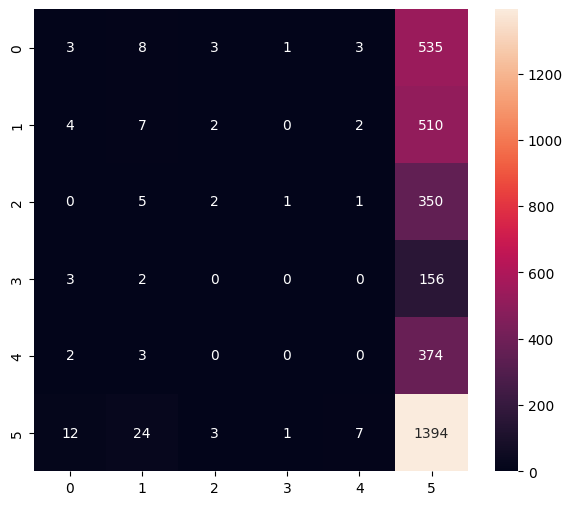

In [104]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



from sklearn.metrics import confusion_matrix
import seaborn as sns
conf = confusion_matrix(test_label_idx, predictions_class)
plt.figure(figsize=(7,6))
sns.heatmap(conf, annot=True, fmt='d')